In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from brian2 import *
from brian2tools import *
import numpy as np
import pandas as pd


# Customize matplotlib
matplotlib.rcParams.update(
    {
        'text.usetex': False,
        'font.family': 'stixgeneral',
        'mathtext.fontset': 'stix',
        'font.size': 22,
        'ytick.color' : 'black',
        "xtick.color" : 'black',
        'axes.labelcolor' : 'black',
        'axes.edgecolor' : 'black'
	}
)

In [2]:
n_points = 100
n_samples = 1
vec_nu = []
for nu_value in np.linspace(0.1, 100, n_points):
	for n in range(n_samples):
		vec_nu.append(nu_value)

vec_nu = np.array(vec_nu)

EL = -60*mV
EE = 0*mV
EI = -80*mV
alpha = 1
tauN = 100*ms
tauI = 10*ms
tauL = 20*ms
vt = -50*mV

eqs = '''
dv/dt = ((EL - v) + gA*(EE - v) + gI*(EI - v))/tauL : volt (unless refractory)
dgA/dt = -gA/tauA : 1
dgI/dt = -gI/tauI : 1
tauA : second
'''

tauA_list = [2]
firing_rate_ta = {'nu':vec_nu, 2:np.zeros(n_points*n_samples)}
CVISI_ta = {'nu':vec_nu, 2:np.zeros(n_points*n_samples)}

for tauA in tauA_list:
	print(tauA, end='\t')
	for i, nu_value in enumerate(vec_nu):
		print(i/size(vec_nu), end=' ')
		start_scope()
		defaultclock.dt = 0.01*ms
		G = NeuronGroup(1, eqs, threshold='v>vt', reset='v=EL', refractory=2*ms, method='rk4')
		GPE = PoissonGroup(400, rates=nu_value*Hz)
		GPI = PoissonGroup(100, rates=nu_value*Hz)

		SE = Synapses(GPE, G, 'w : 1', on_pre='gA += w')
		SI = Synapses(GPI, G, 'w : 1', on_pre='gI += w')
		SE.connect()
		SI.connect()

		G.v = EL
		SE.w = 0.1
		SI.w = 0.4

		G.tauA = tauA*ms

		run(5000*ms)

		M = StateMonitor(G, 'v', record=True)
		spkM = SpikeMonitor(G)
		
		run(20000*ms)

		train = spkM.spike_trains()
		ISI = np.diff(train[0])

		firing_rate_ta[tauA][i] = spkM.num_spikes/20.0
		CVISI_ta[tauA][i] = ISI.var()/ISI.mean()**2

	print()

2	0.0 

WARNING    "tauA" is an internal variable of group "neurongroup", but also exists in the run namespace with the value 2. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


0.01 

WARNING    "tauA" is an internal variable of group "neurongroup_1", but also exists in the run namespace with the value 2. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1 0.11 0.12 0.13 0.14 0.15 0.16 0.17 0.18 0.19 0.2 0.21 0.22 0.23 0.24 0.25 0.26 0.27 0.28 0.29 0.3 0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4 0.41 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5 0.51 0.52 0.53 0.54 0.55 0.56 0.57 0.58 0.59 0.6 0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69 0.7 0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8 0.81 0.82 0.83 0.84 0.85 0.86 0.87 0.88 0.89 0.9 0.91 0.92 0.93 0.94 0.95 0.96 0.97 0.98 0.99 


In [3]:
# Convert to pandas DataFrame
df_firing_rate = pd.DataFrame.from_dict(firing_rate_ta)
df_CVISI_ta = pd.DataFrame.from_dict(CVISI_ta)

# Save Dataframe do csv file
df_firing_rate.to_csv('firing_rate_iRate_tauFixed_2.dat')
df_CVISI_ta.to_csv('CVISI_ta_iRate_tauFixed_2.dat')

,nu,2
0,0.100000,0.0
1,1.109091,0.0
2,2.118182,0.0
3,3.127273,0.0
4,4.136364,0.0
...,...,...
95,95.963636,0.0
96,96.972727,0.0
97,97.981818,0.0
98,98.990909,0.0


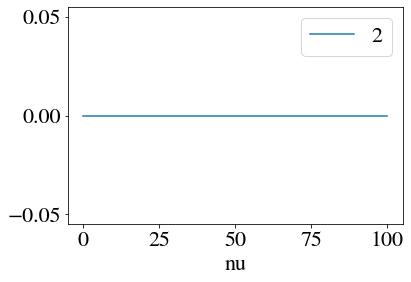

In [5]:
df_firing_rate.plot('nu', 2)
df_firing_rate

<AxesSubplot:xlabel='nu'>

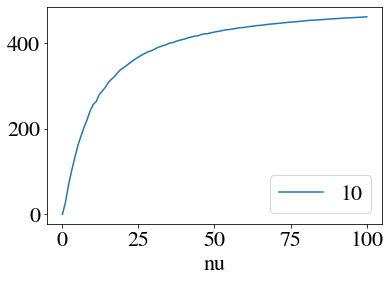

In [5]:
df_firing_rate.plot('nu', 5)

In [41]:
EL = -60*mV
EE = 0*mV
EI = -80*mV
alpha = 1
tauN = 100*ms
tauI = 10*ms
tauL = 20*ms
vt = -50*mV
nu_value = 200

eqs = '''
dv/dt = ((EL - v) + gA*(EE - v) + gI*(EI - v))/tauL : volt (unless refractory)
dgA/dt = -gA/tauA : 1
dgI/dt = -gI/tauI : 1
tauA : second
'''

start_scope()
defaultclock.dt = 0.01*ms
G = NeuronGroup(1, eqs, threshold='v>vt', reset='v=EL', refractory=2*ms, method='rk4')
GPE = PoissonGroup(400, rates=nu_value*Hz)
GPI = PoissonGroup(100, rates=nu_value*Hz)

SE = Synapses(GPE, G, 'w : 1', on_pre='gA += w')
SI = Synapses(GPI, G, 'w : 1', on_pre='gI += w')
SE.connect()
SI.connect()

G.v = EL
SE.w = 0.8
SI.w = 1.6

G.tauA = tauA*ms

run(20000*ms)

M = StateMonitor(G, 'v', record=True)
spkM = SpikeMonitor(G)

run(1000*ms)

train = spkM.spike_trains()
ISI = np.diff(train[0])

<AxesSubplot:xlabel='time (ms)', ylabel='v (mV)'>

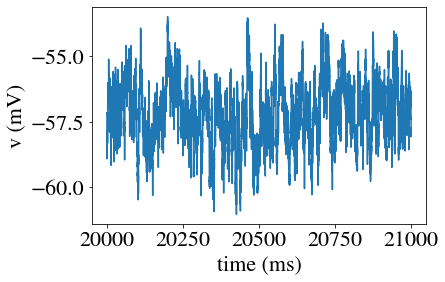

In [43]:
# plot_state(M.t[:1000], M.v.T[:1000])
brian_plot(M)

In [6]:
df_rate = pd.read_csv('firing_rate_iRate_tauFixed.dat', index_col=0)
df_rate_2 = pd.read_csv('firing_rate_iRate_tauFixed_2.dat', index_col=0)
df_rate_5 = pd.read_csv('firing_rate_iRate_tauFixed_5.dat', index_col=0)
df_rate_10 = pd.read_csv('firing_rate_iRate_tauFixed_10.dat', index_col=0)

In [33]:
# df_rate = df_rate.join([df_rate_2['2'], df_rate_10['10']])
cols = df_rate.columns.tolist()
cols
cols = cols[:1] + cols[-2:-1] + cols[1:2] + cols[-1:] + cols[2:5] 

In [35]:
df_rate[cols].to_csv('firing_rate_iRate_tauFixed.dat')